# SVR SUPPPORT VECTOR REGRESSION MODEL

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values # level
y = dataset.iloc[:, -1].values # salary
x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

reshape y column into a single column

In [6]:
y=y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)
x,y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

# Training the SVR Model on the whole dataset

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') #with that kernel
regressor.fit(x,y)

C:\Users\Credd\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Predicting a new result

In [19]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) #regressor.predict --> prediction
# inverse_transform ---> reverts the standard scaler

array([170370.0204065])

# Visualizing the SVR results

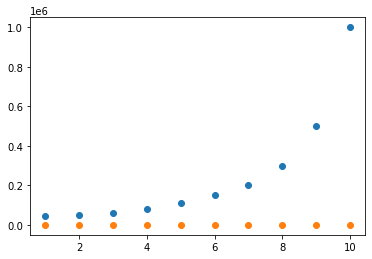

In [22]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)))